In [13]:
#libraries imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# mount google colab to find dataset file path
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [4]:
# read in the data and print the first 5 rows of the data
credit_data = pd.read_csv("/gdrive/MyDrive/DATASETS/creditcard.csv")
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# dataset information
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# check the number of missing values in each column
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# checking the distribution of legit and fraudulent transactions 
#from the class column
credit_data['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

In [8]:
# separating the data for analysis
legit = credit_data[credit_data.Class == 0]
fraud = credit_data[credit_data.Class == 1]

In [9]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [10]:
# get statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Creating a visualizatoin for the class distribution

Text(0, 0.5, 'Frequency')

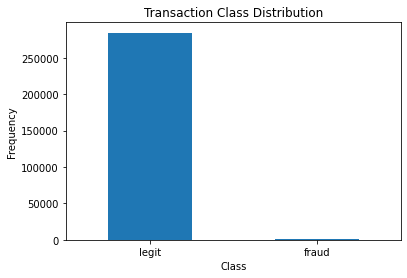

In [16]:
RANDOM_SEED = 42

LABELS = ["legit", "fraud"]

count_classes = pd.value_counts(credit_data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [14]:
# compare the values for both legit and fraudulent transactions
credit_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Build a sample dataset from the original dataset containing same number of legit trsnsactions to match the total number of fraudulent transations due to undersampling.


In [15]:
# randomly select 492 legit transactions to match the 492 fraudulent transactions
# to make a even distribution
legit_sample = legit.sample(n=492)


In [16]:
# concactnating 2 dataframes (legit and fraudulent samples)
new_data = pd.concat([legit_sample, fraud], axis = 0)

In [17]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
278769,168420.0,2.054824,0.095793,-2.182854,0.133687,0.788374,-0.960305,0.671498,-0.333220,-0.083438,...,0.218008,0.678902,-0.029640,0.737450,0.469989,-0.148153,-0.069268,-0.075791,13.45,0
202246,134235.0,-0.653034,0.170848,-0.839038,-1.053801,1.372301,0.791547,1.134110,0.063277,0.342022,...,-0.008401,0.368002,0.297400,-0.317381,-2.025328,-0.140319,-0.334228,-0.243975,101.58,0
16159,27580.0,-0.818667,0.644198,1.325780,1.112588,0.587000,0.430755,0.520190,0.124360,-0.003769,...,-0.103123,0.222633,-0.196870,-0.311594,-0.077662,-0.238930,0.372179,0.056461,34.00,0
197340,131964.0,-2.390475,-0.865344,2.231522,-0.876310,1.320379,-0.445173,-0.740088,0.016564,0.885535,...,-0.207032,0.159430,-0.893330,0.854930,0.247489,-0.050530,0.081210,-0.115076,43.25,0
169835,119881.0,1.987620,-0.263378,-1.356031,0.393570,-0.188517,-1.230687,0.144124,-0.285627,0.857831,...,0.268127,0.788391,-0.019785,-0.083800,0.183564,-0.093712,-0.030315,-0.054943,41.68,0


In [18]:
# checing the distribution of the new dataset
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

The result shows the values for both transaction are now uniform

In [19]:
# getting the mean of the new dataset
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93807.928862,-0.006139,0.015828,0.053680,0.025241,-0.014597,0.077394,-0.013715,0.033557,0.018714,...,0.019112,-0.009334,-0.029995,0.030294,-0.004849,0.017569,-0.024946,0.012242,-0.003070,83.505610
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [20]:
# splitting data into features and tergets
# drop the class column to store it in a new variable
x = new_data.drop(columns= 'Class', axis = 1)
y = new_data['Class']

In [21]:
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
278769  168420.0  2.054824  0.095793 -2.182854  0.133687  0.788374 -0.960305   
202246  134235.0 -0.653034  0.170848 -0.839038 -1.053801  1.372301  0.791547   
16159    27580.0 -0.818667  0.644198  1.325780  1.112588  0.587000  0.430755   
197340  131964.0 -2.390475 -0.865344  2.231522 -0.876310  1.320379 -0.445173   
169835  119881.0  1.987620 -0.263378 -1.356031  0.393570 -0.188517 -1.230687   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [22]:
print(y)

278769    0
202246    0
16159     0
197340    0
169835    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Splitting the data into Training and Testing data

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify = y, random_state=2)

In [25]:
print(x.shape, x_train.shape, x_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training using the Logistic Resression Model (mostly used for binary classification)

In [26]:
model = LogisticRegression()

In [27]:
# training the Logistic Regression Model with Training Data
model.fit(x_train, y_train)

LogisticRegression()

Model Evaluation

Accuracy Score

In [28]:
# accuracy on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [29]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9224904701397713


In [31]:
# accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [32]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.8934010152284264
